# TASK 3 -  Neural Networks

## Part 1

In [5]:
import random
import numpy as np
import torch.nn as nn
import torch.optim
import torch
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

#### Loading Dataset

In [6]:
path =f"C:\\Users\\30098870\\OneDrive - University of South Wales\\ML-ASSESMENT 2"

train_data = torch.load(f"{path}\\train_data.pt") 
test_data = torch.load(f"{path}\\test_data.pt") 
y_train = torch.load(f"{path}\\train_labels.pt") 
y_test = torch.load(f"{path}\\test_labels.pt") 

####  Image display

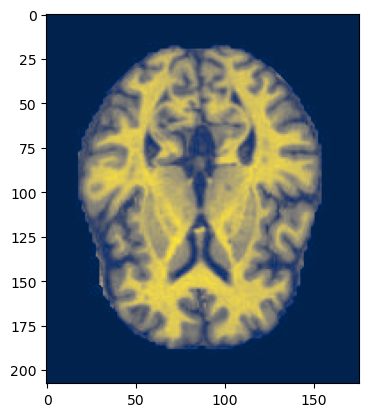

In [12]:
sample_num = 500
plt.imshow(train_data[sample_num][0], cmap='cividis')
plt.show()

#### Train and Test Datasets

In [13]:
x_train = train_data.view(train_data.shape[0],-1)
x_train.shape # shape of the train data for the simple neural network model

torch.Size([5121, 109824])

In [14]:
x_test = test_data.view(test_data.shape[0],-1) 
x_test.shape # shape of the test data for the simple neural network model

torch.Size([1279, 109824])

 #### Instances for Scaler

In [15]:
#create an instance of standard scaler
s_scaler = StandardScaler()

In [16]:
x_train_numpy = x_train.numpy()
x_train_numpy_scaled = s_scaler.fit_transform(x_train_numpy)
x_train = torch.tensor(x_train_numpy_scaled)
train_data = torch.tensor(x_train.reshape(train_data.shape))
print(f"x_train for simple neural network: {x_train.shape}")
print(f"train_data for CNN: {train_data.shape}")

C:\Users\30098870\AppData\Local\Temp\ipykernel_7072\633985769.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_data = torch.tensor(x_train.reshape(train_data.shape))


x_train for simple neural network: torch.Size([5121, 109824])
train_data for CNN: torch.Size([5121, 3, 208, 176])


In [17]:
x_test_numpy = x_test.numpy()
x_test_numpy_scaled = s_scaler.transform(x_test_numpy)
x_test = torch.tensor(x_test_numpy_scaled)
test_data = torch.tensor(x_test.reshape(test_data.shape))
print(f"x_test for simple neural network: {x_test.shape}")
print(f"test_data for CNN: {test_data.shape}")

x_test for simple neural network: torch.Size([1279, 109824])
test_data for CNN: torch.Size([1279, 3, 208, 176])


C:\Users\30098870\AppData\Local\Temp\ipykernel_7072\488634410.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_data = torch.tensor(x_test.reshape(test_data.shape))


#### Number of features

In [18]:
#number of features
no_features = x_train.shape[1]
no_features

109824

#### Checking for GPU

In [19]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on the GPU")
else:
    device = torch.device("cpu")
    print("running on the CPU")

running on the GPU


### Simple Neural Network

In [22]:
#Simple neural network basic model
class SimpleNN1(nn.Module):
    
    """A very simple neural network model with configurable number of features and other layers
    """
    
    def __init__(self,n_features):
        
        """Initialising the neural network layers
        """
        
        super().__init__()
        self.fc1 = nn.Linear(n_features,1024)
        self.fc2 = nn.Linear(1024,512)
        self.fc3 = nn.Linear(512,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,64)
        self.fc6 = nn.Linear(64,4)
        
        
        
    def forward(self,x):
        
        """ Use this definition to Forward pass through the neural network
        """
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.log_softmax(self.fc6(x),dim=1)
        return x
    
    
    def train(self,epochs,x_train,y_train,b_number):
        """Train the neural network
        """
        self=self.to(device)
        optimizer = optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for a in tqdm(range(0,len(x_train),b_number)):
                
                batch_for_x = x_train[a:a+b_number].to(device)
                batch_for_y = y_train[a:a+b_number].to(device)
                y_predict = self.forward(batch_for_x)
                loss = loss_function(y_predict,batch_for_y)
                self.zero_grad()
                loss.backward()
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        """Testing the neural network.
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_predicted,y_test):
        """ Calculate accuracy of the predictions.
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_predicted[a]==y_test[a]:
                no_of_pred.append(a)
            
        
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")             

In [24]:
model1 = SimpleNN1(n_features=no_features)
model1

SimpleNN1(
  (fc1): Linear(in_features=109824, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=64, bias=True)
  (fc6): Linear(in_features=64, out_features=4, bias=True)
)

In [25]:
model1.train(epochs=10,x_train=x_train,y_train=y_train,b_number=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:06<00:00,  8.66it/s]


Iteration 0 | Loss: 1.2422791719436646


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 46.98it/s]


Iteration 1 | Loss: 1.1379265785217285


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 47.67it/s]


Iteration 2 | Loss: 0.9908725023269653


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 47.75it/s]


Iteration 3 | Loss: 0.8583840727806091


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 47.97it/s]


Iteration 4 | Loss: 0.8043634295463562


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 47.94it/s]


Iteration 5 | Loss: 0.7586842775344849


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 48.22it/s]


Iteration 6 | Loss: 0.7097172141075134


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 48.41it/s]


Iteration 7 | Loss: 0.648405909538269


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 48.37it/s]


Iteration 8 | Loss: 0.5560585856437683


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:01<00:00, 48.46it/s]

Iteration 9 | Loss: 0.4295668303966522


In [26]:
y_predicted_basic = model1.test(x_test=x_test)

In [27]:
model1.accuracy(y_predicted=y_predicted_basic,y_test=y_test)

accuracy is: 0.5285379202501954


##### Accuracy for Simple Neural Network = 52.85%

### Simple Neural Network - Improved Model

In [28]:
#Simple neural network improved model
class SimpleNN2(nn.Module):
    
    """ A simple neural network model with configurable number of features and layers.
    """
    
    def __init__(self,n_features):
        
        """Initialising the neural network layers
        """
        
        super().__init__()
        self.fc1 = nn.Linear(n_features,128)
        self.fc2 = nn.Linear(128,4)
        
        
    def forward(self,x):
        
        """Forward pass through the neural network
        """
        
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first layer
        x = F.log_softmax(self.fc2(x),dim=1) # Apply log_softmax activation to the output of the second layer
        return x
    
    
    def train(self,epochs,x_train,y_train,b_number):
        """Train the neural network
        """
        self=self.to(device)                              # Move the model to the specified device
        print(device)                                     # Print the device being used for training
        optimizer = optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for a in tqdm(range(0,len(x_train),b_number)):
                
                batch_for_x = x_train[a:a+b_number].to(device)
                batch_for_y = y_train[a:a+b_number].to(device)
                y_predict = self.forward(batch_for_x)
                loss = loss_function(y_predict,batch_for_y)
                self.zero_grad()
                loss.backward()
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        """Testing the neural network
        """
        self.to('cpu')                           # Move the model to CPU for testing
        with torch.no_grad():
            y_predicted = self.forward(x_test)
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_predicted,y_test):
        """Calculating the accuracy of the predictions.
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_predicted[a]==y_test[a]:
                no_of_pred.append(a)
            
        
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")         

In [29]:
model2 = SimpleNN2(n_features=no_features)
model2

SimpleNN2(
  (fc1): Linear(in_features=109824, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)

In [30]:
model2.train(epochs=10,x_train=x_train,y_train=y_train,b_number=15)

cuda:0


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:01<00:00, 259.10it/s]


Iteration 0 | Loss: 0.030949145555496216


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 347.69it/s]


Iteration 1 | Loss: 0.001773678231984377


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 345.81it/s]


Iteration 2 | Loss: 0.0020788400433957577


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 344.07it/s]


Iteration 3 | Loss: 0.001839446951635182


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 344.76it/s]


Iteration 4 | Loss: 0.0012967612128704786


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 345.81it/s]


Iteration 5 | Loss: 0.0009915234986692667


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 342.69it/s]


Iteration 6 | Loss: 0.0008017970831133425


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 345.11it/s]


Iteration 7 | Loss: 0.0006691567250527442


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:01<00:00, 337.88it/s]


Iteration 8 | Loss: 0.0005716162850148976


100%|███████████████████████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 344.76it/s]

Iteration 9 | Loss: 0.000498238776344806


In [32]:
y_predicted_improved = model2.test(x_test=x_test)

In [33]:
model2.accuracy(y_predicted=y_predicted_improved,y_test=y_test)

accuracy is: 0.6700547302580141


##### Accuracy for Simple Neural Network (Improved) = 67.00%

## Convolutional Neural Network - CNN

In [35]:
#Checking the shape of the data
class Conv_NNtest(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")
        return x

In [36]:
net = Conv_NNtest(n_channels=3)
test_output = net.forward(test_data[0:10])

Step 1: Shape of Data before Flattening: torch.Size([10, 16, 49, 41])


#### Basic Convolutional Network (Basic - CNN)

In [37]:
# A basic convolutional model
class Conv_NN1(nn.Module):
    
    """Convolutional neural network model
    """
    
    def __init__(self, n_channels):
        
        """Initialising the convolutional layers and fully connected layers
         """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 8, kernel_size = (5,5) )   # First convolutional layer
        self.conv2 = nn.Conv2d(in_channels = 8, out_channels = 16,  kernel_size = (5,5))           # Second convolutional layer
        self.pool = nn.MaxPool2d((2,2))                                                            # Max pooling layer
        
        self.flatten = nn.Flatten(1)                                                              # Flatten layer
        
        self.fc1 = nn.Linear(16*49*41, 3000)                                                      # First fully connected layer
        self.fc2 = nn.Linear(3000, 4)                                                             # Second fully connected layer
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network
        """
        
        x = F.relu(self.conv1(x))               # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = self.flatten(x)
        
        x = F.relu(self.fc1(x))                 # Apply ReLU activation to the output of the first fully connected layer
        x = F.log_softmax(self.fc2(x), dim = 1) # Apply log_softmax activation to the output of the second fully connected layer
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network       
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """"Test the convolutional neural network
         """
        
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Calculate accuracy of the predictions
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")             

In [38]:
mod1 = Conv_NN1(n_channels=3)

In [39]:
mod1.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:06<00:00,  7.76it/s]


Iteration 0 | Loss: 0.8407370448112488


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.63it/s]


Iteration 1 | Loss: 0.7587136030197144


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.67it/s]


Iteration 2 | Loss: 0.6647259593009949


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.73it/s]


Iteration 3 | Loss: 0.5448251962661743


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.68it/s]


Iteration 4 | Loss: 0.45353245735168457


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.11it/s]


Iteration 5 | Loss: 0.31760531663894653


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.58it/s]


Iteration 6 | Loss: 0.32953259348869324


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.41it/s]


Iteration 7 | Loss: 0.21780772507190704


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.61it/s]


Iteration 8 | Loss: 0.3590524196624756


100%|██████████████████████████████████████████████████████████████████████████████████| 52/52 [00:02<00:00, 20.59it/s]

Iteration 9 | Loss: 0.6093188524246216


In [40]:
y_predicted_basic= mod1.test(x_test=test_data)

In [41]:
mod1.accuracy(y_pred=y_predicted_basic,y_test=y_test)

accuracy is: 0.5496481626270524


##### Accuracy for Basic Convolutional Neural network (Basic CNN) = 54.96%

### Convolutional Neural Network - Improved (CNN - Improved)

In [42]:
#Check the shape of the data
class Conv_NNtest(nn.Module):
    def __init__(self, n_channels):
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))
        self.pool = nn.MaxPool2d((2,2))
        
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)

        print(f"Step 1: Shape of Data before Flattening: {x.shape}")
        return x

In [43]:
net = Conv_NNtest(n_channels=3)
test_output = net.forward(train_data[0:10])

Step 1: Shape of Data before Flattening: torch.Size([10, 64, 22, 18])


In [45]:
#The Improved convolutional model
class Conv_NN2(nn.Module):
    
    """Convolutional neural network model with multiple convolutional layers
    """
    
    def __init__(self, n_channels):
        
        """Initialising the convolutional layers and fully connected layers
        """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )  # First convolutional layer
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))          # Second convolutional layer
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))          # Third convolutional layer
        self.pool = nn.MaxPool2d((2,2))                                                            # Max pooling layer
        
        self.flatten = nn.Flatten(1)                                                               # Flatten layer
        
        self.fc1 = nn.Linear(64*22*18, 128)                                                        # First fully connected layer
        self.fc2 = nn.Linear(128, 4)                                                               # Second fully connected layer
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network
        """
        
        x = F.relu(self.conv1(x))            # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(x)                     # max pooling

        x = F.relu(self.conv2(x))            # Apply ReLU activation to the output of the second convolutional layer
        x = self.pool(x)                     # max pooling
        
        x = F.relu(self.conv3(x))            # Apply ReLU activation to the output of the third convolutional layer
        x = self.pool(x)                     # max pooling
        
        x = self.flatten(x)                  # Flatten the output    
        
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first fully connected layer
        x = F.log_softmax(self.fc2(x), dim = 1) # Apply log_softmax activation to the output of the second fully connected layer
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.01)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Calculate accuracy of the predictions
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")

In [46]:
mod2 = Conv_NN2(n_channels=3)

In [47]:
mod2.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5)

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 224.25it/s]


Iteration 0 | Loss: 0.0288811344653368


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 239.47it/s]


Iteration 1 | Loss: 0.0001494772732257843


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 238.61it/s]


Iteration 2 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 237.82it/s]


Iteration 3 | Loss: 0.000739658426027745


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 236.48it/s]


Iteration 4 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 236.97it/s]


Iteration 5 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 238.13it/s]


Iteration 6 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 236.45it/s]


Iteration 7 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 226.44it/s]


Iteration 8 | Loss: 0.0


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 232.08it/s]


Iteration 9 | Loss: 0.0


In [48]:
y_predicted_improved= mod2.test(x_test=test_data)

In [49]:
mod2.accuracy(y_pred=y_predicted_improved,y_test=y_test)

accuracy is: 0.6802189210320563


##### Accuracy for Improved Convolutional Neural Network ( CNN - Improved) = 68.02%

### Part 2 - Optimized Convolutional Neural Network with different learning rates
#### Q.1

In [50]:
#learning rate of 0.000000001 for improved convolutional model
class Conv_NN3(nn.Module):
    
    """Convolutional neural network model with multiple convolutional layers
    """
    
    def __init__(self, n_channels):
        
        """Initialising the convolutional layers and fully connected layers
         """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )  # First convolutional layer
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))          # Second convolutional layer
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))          # Third convolutional layer
        self.pool = nn.MaxPool2d((2,2))                                                            # Max pooling layer
        
        self.flatten = nn.Flatten(1)                                                              # Flatten layer
        
        self.fc1 = nn.Linear(64*22*18, 128)                                                       # First fully connected layer
        self.fc2 = nn.Linear(128, 4)                                                              # Second fully connected layer
        
    def forward(self, x):
        
        """Forward pass through the convolutional neural network
        """
        
        x = F.relu(self.conv1(x))         # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(x)                  # Perform max pooling

        x = F.relu(self.conv2(x))         # Apply ReLU activation to the output of the second convolutional layer
        x = self.pool(x)                  # Perform max pooling
        
        x = F.relu(self.conv3(x))         # Apply ReLU activation to the output of the third convolutional layer
        x = self.pool(x)                  # Perform max pooling
        
        x = self.flatten(x)                # Flatten the output
        
        x = F.relu(self.fc1(x))          # Apply ReLU activation to the output of the first fully connected layer
        x = F.log_softmax(self.fc2(x), dim = 1)  # Apply log_softmax activation to the output of the second fully connected layer
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network
         """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=0.00000001)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network
        """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Calculate accuracy of the predictions
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")

In [51]:
mod3 = Conv_NN3(n_channels=3)

In [52]:
mod3.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5)

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 221.50it/s]


Iteration 0 | Loss: 1.4486513137817383


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 236.25it/s]


Iteration 1 | Loss: 1.4486085176467896


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 241.38it/s]


Iteration 2 | Loss: 1.4485653638839722


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 241.19it/s]


Iteration 3 | Loss: 1.4485223293304443


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 236.32it/s]


Iteration 4 | Loss: 1.4484795331954956


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 235.29it/s]


Iteration 5 | Loss: 1.4484366178512573


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 239.24it/s]


Iteration 6 | Loss: 1.448393702507019


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 239.27it/s]


Iteration 7 | Loss: 1.4483507871627808


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 234.83it/s]


Iteration 8 | Loss: 1.4483072757720947


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 237.43it/s]

Iteration 9 | Loss: 1.4482641220092773


In [55]:
y_predicted_improved_l1= mod3.test(x_test=test_data)

In [56]:
mod3.accuracy(y_pred=y_predicted_improved_l1,y_test=y_test)

accuracy is: 0.3487099296325254


##### Accuracy with learning rate of 0.00000001 = 34.87%

In [57]:
#learning rate of 10 for improved convolutional model
class Conv_NN4(nn.Module):
    
    """Convolutional neural network model with multiple convolutional layers
    """
    
    def __init__(self, n_channels):
        
        """Initialising the convolutional layers and fully connected layers
        """
        
        super().__init__()
        
        self.conv1 = nn.Conv2d(in_channels = n_channels, out_channels = 16, kernel_size = (5,5) )  # First convolutional layer
        self.conv2 = nn.Conv2d(in_channels = 16, out_channels = 32,  kernel_size = (5,5))          # Second convolutional layer
        self.conv3 = nn.Conv2d(in_channels = 32, out_channels = 64,  kernel_size = (5,5))          # Third convolutional layer
        self.pool = nn.MaxPool2d((2,2))                                                            # Max pooling layer
        
        self.flatten = nn.Flatten(1)                                                             # Flatten layer
        
        self.fc1 = nn.Linear(64*22*18, 128)                                                      # First fully connected layer
        self.fc2 = nn.Linear(128, 4)                                                              # Second fully connected layer
        
    def forward(self, x):
        
        """"Forward pass through the convolutional neural network
         """
        
        x = F.relu(self.conv1(x))                  # Apply ReLU activation to the output of the convolutional layers
        x = self.pool(x)                           # Perform max pooling

        x = F.relu(self.conv2(x))
        x = self.pool(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = self.flatten(x)                        # Flatten the output
        
        x = F.relu(self.fc1(x))                    # Apply ReLU activation to the output of the first fully connected layer
        x = F.log_softmax(self.fc2(x), dim = 1)    # Apply log_softmax activation to the output of the second fully connected layer
        return x
    
    
    def train(self,epochs,x_train,y_train,batch_number):
        
        """Train the convolutional neural network
        """
        self=self.to(device)
        optimizer = torch.optim.SGD(self.parameters(),lr=10)
        loss_function = nn.CrossEntropyLoss()
        
        for epoch in range(epochs):
            for i in tqdm(range(0,len(x_train),batch_number)):
                
                batch_x = x_train[i:i+batch_number].to(device)
                batch_y = y_train[i:i+batch_number].to(device)
                y_predict = self.forward(batch_x)
                loss = loss_function(y_predict,batch_y)
                
                self.zero_grad()
                loss.backward()
                
                optimizer.step()
                
            print(f"Iteration {epoch} | Loss: {loss}")
            
    def test(self,x_test):
        
        """Test the convolutional neural network
         """
        self.to('cpu')
        with torch.no_grad():
            y_predicted = self.forward(x_test)
            
        y_predicted = torch.argmax(y_predicted,dim=1)
        
        return y_predicted
        
    def accuracy(self,y_pred,y_test):
        
        """Calculate accuracy of the predictions
        """
        
        no_of_pred = []
        
        for a in range(len(y_test)):
            if y_pred[a]==y_test[a]:
                no_of_pred.append(a)
            
        accuracy = len(no_of_pred)/len(y_test)
        print(f"accuracy is: {accuracy}")          

In [58]:
mod4 = Conv_NN4(n_channels=3)

In [59]:
mod4.train(epochs=10,x_train=train_data,y_train=y_train,batch_number=5)

100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 240.57it/s]


Iteration 0 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.64it/s]


Iteration 1 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.15it/s]


Iteration 2 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 255.56it/s]


Iteration 3 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 250.13it/s]


Iteration 4 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.48it/s]


Iteration 5 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:04<00:00, 253.68it/s]


Iteration 6 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 256.78it/s]


Iteration 7 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 257.19it/s]


Iteration 8 | Loss: nan


100%|█████████████████████████████████████████████████████████████████████████████| 1025/1025 [00:03<00:00, 258.19it/s]

Iteration 9 | Loss: nan


In [60]:
y_predicted_improved_l2= mod4.test(x_test=test_data)

In [61]:
mod4.accuracy(y_pred=y_predicted_improved_l2,y_test=y_test)

accuracy is: 0.13995308835027365


#### Accuracy with learning rate of 10 = 13.10%

### Discussion on learning rates

#### In the previous model trained with a learning rate of 0.00000001,the recorded accuracy was close to 34.87%, suggesting poor performance. Additionally, when trained with a learning rate of 10, the model failed to generalize effectively, resulting in a loss value of 'nan'. This 'nan' loss signifies the inability to calculate the loss accurately.

### Advantages of Higher Learning Rate:
#### A higher learning rate offers several advantages in training machine learning models. Firstly, it facilitates faster convergence, as the model takes larger steps in the parameter space during gradient descent, leading to quicker attainment of the optimal solution. Secondly, it helps the model escape from local minima by allowing it to explore different regions of the parameter space more aggressively. This capability is particularly advantageous in avoiding stagnation and promoting exploration in complex optimization landscapes. Moreover, in shallow networks or simpler optimization scenarios, a higher learning rate proves beneficial as it enables rapid attainment of a satisfactory solution without the risk of getting stuck in suboptimal states.

### Disadvantages of Higher Learning Rate:
#### High learning rates present several disadvantages during model training. Firstly, they can lead to overshooting, where the optimizer surpasses the minimum point, resulting in unstable training behavior and divergence from the optimal solution. This overshooting phenomenon can cause erratic fluctuations in the loss function and hinder convergence. Secondly, the instability induced by high learning rates can manifest as oscillations or divergence in the training process, making it challenging to effectively optimize the model parameters. Additionally, models trained with excessively high learning rates may struggle with generalization, as they prioritize fitting the training data closely over learning underlying patterns, potentially compromising performance on unseen data due to overfitting.


### Advantages of Lower Learning Rate:
#### Lower learning rates contribute to stable training dynamics by facilitating smaller parameter updates, which promotes steady and reliable convergence. Again, they foster better generalization by encouraging the model to discern more intricate patterns in the data, thereby enhancing performance on unseen examples. Lower learning rates help prevent oscillations and overshooting during training, ensuring smoother progress towards achieving the optimal solution.


### Disadvantages of Lower Learning Rate:
#### Training with lower learning rates necessitates more iterations for convergence, which, again, extends training time, particularly for complex models and large datasets. Lower learning rates can potentially lead to the optimizer getting stuck in local minima, especially in models with intricate loss landscapes. Models trained with very low learning rates may exhibit sensitivity to parameter initialisation, further increasing the likelihood of suboptimal solutions.

## Q.2

### Adavantages of Higher Batch Size:
#### Increasing the batch size in training data offers several benefits.Larger batch sizes enable better parallelism, particularly advantageous on hardware such as GPUs, thereby accelerating training times by effectively utilizing parallel processing capabilities.Also, the use of larger batch sizes results in more stable and less noisy gradient estimates, facilitating smoother convergence during training.It also allows for efficient vectorized operations, leveraging optimized linear algebra libraries, which further enhances training efficiency by enabling faster computations.


### Disadvantages of Higher Batch Size:
#### Memory constraints arise when training with larger batch sizes, necessitating more memory resources and consequently restricting the size of models that can be trained on existing hardware. Furthermore, there is a risk of overfitting with large batch sizes, as the model may prioritize memorizing the training data instead of learning generalizable patterns. Moreover, models trained with large batch sizes may exhibit reduced generalization performance, as they tend to converge to sharp minima in the loss landscape, which are often associated with poorer generalization to unseen data.


### Advantages of Lower Batch Size: 
#### Utilizing smaller batch sizes promotes improved generalization in machine learning models by preventing overfitting and encouraging the learning of underlying patterns rather than memorizing the training data. Additionally, training with smaller batch sizes enhances memory efficiency, making it feasible to train larger models on hardware with limited resources. Furthermore, smaller batch sizes facilitate better exploration of the parameter space, allowing the model to thoroughly investigate different regions and potentially discover superior solutions during training.


### Disadvantages of Lower Batch Size:
#### With smaller batch sizes, gradient estimates tend to be noisier, which increases the variance in parameter updates and can result in slower convergence. Additionally, training with smaller batch sizes usually necessitates more iterations to reach convergence, thereby prolonging training durations. Furthermore, smaller batch sizes may lead to less efficient utilization of hardware resources, particularly on GPUs, where parallelism is more effective with larger batches.